<a href="https://colab.research.google.com/github/newtonotwen/self_project/blob/main/Poor_country_classification_using_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Load and Import Package 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Basic Description, Data Preparation

In [2]:
df= pd.read_csv('./Data_Negara_HELP.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#Check missing value

In [4]:
df.isnull().count()

Negara              167
Kematian_anak       167
Ekspor              167
Kesehatan           167
Impor               167
Pendapatan          167
Inflasi             167
Harapan_hidup       167
Jumlah_fertiliti    167
GDPperkapita        167
dtype: int64

In [5]:

def missing_value(df):
    total_missing = []
    percentage_missing = []
    dimensions_missing = []
    dtypes_missing = []
    
    for col in df.columns:
        #dtypes
        dtypes = df[col].dtypes
        dtypes_missing.append(dtypes)
        #total data 
        n_rows = len(df)
        #total missing
        total = df[col].isnull().sum()
        total_missing.append(total)
        #percentage of missing
        percent = round((total/len(df))*100,2)
        percentage_missing.append(percent)
        #dimensions
        dimensions = len(df[col].unique())
        dimensions_missing.append(dimensions)
           
    missing_value = pd.DataFrame()
    missing_value['features'] = df.columns 
    missing_value['dtypes'] = dtypes_missing 
    missing_value['total data'] = n_rows
    missing_value['total missing'] = total_missing
    missing_value['precentage missing (%)'] = percentage_missing
    missing_value['dimension'] = dimensions_missing
    missing_value.sort_values(by = 'total missing', inplace= True, ascending = False)
    missing_value.reset_index(inplace = True, drop = True)
    display(missing_value)


In [6]:
missing_value(df)

,features,dtypes,total data,total missing,precentage missing (%),dimension
0,Negara,object,167,0,0.0,167
1,Kematian_anak,float64,167,0,0.0,139
2,Ekspor,float64,167,0,0.0,147
3,Kesehatan,float64,167,0,0.0,147
4,Impor,float64,167,0,0.0,151
5,Pendapatan,int64,167,0,0.0,156
6,Inflasi,float64,167,0,0.0,156
7,Harapan_hidup,float64,167,0,0.0,127
8,Jumlah_fertiliti,float64,167,0,0.0,138
9,GDPperkapita,int64,167,0,0.0,157


#Visualisasi Korelasi

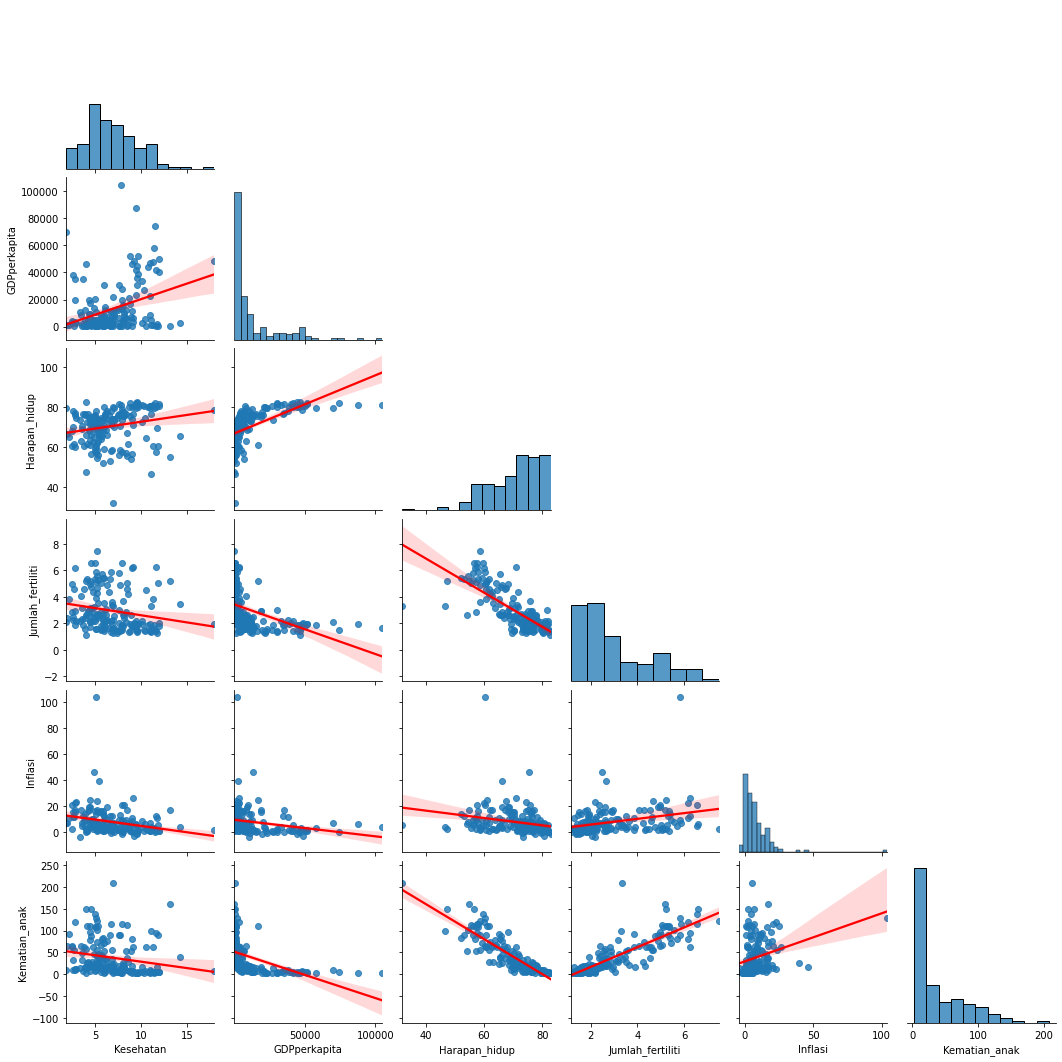

In [7]:
sns.pairplot(df[['Kesehatan','GDPperkapita','Harapan_hidup','Jumlah_fertiliti','Inflasi','Kematian_anak']], corner=True, kind='reg',  plot_kws={'line_kws':{'color':'red'}})

In [8]:
ddf=df[['Kesehatan','GDPperkapita','Harapan_hidup','Jumlah_fertiliti','Inflasi','Kematian_anak']]

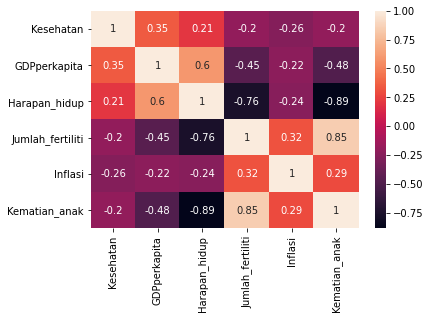

In [9]:
sns.heatmap(ddf.corr(), annot=True, fmt='.2g')

**Kesehatan memiliki korelasi kecil**
**Tidak dimasukkan dalam parameter kemiskinan***

In [10]:
new_df= df[['Kematian_anak','Harapan_hidup','Jumlah_fertiliti','GDPperkapita']]

**Memilih Parameter yang paling kuar correlation nya**

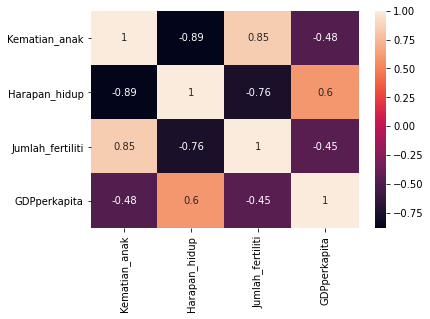

In [11]:
sns.heatmap(new_df.corr(), annot=True, fmt='.2g')

In [12]:
new_df.fillna(method='ffill')

,Kematian_anak,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,90.2,56.2,5.82,553
1,16.6,76.3,1.65,4090
2,27.3,76.5,2.89,4460
3,119.0,60.1,6.16,3530
4,10.3,76.8,2.13,12200
...,...,...,...,...
162,29.2,63.0,3.50,2970
163,17.1,75.4,2.47,13500
164,23.3,73.1,1.95,1310
165,56.3,67.5,4.67,1310


#Boxplot sebelum Handling Outlier

In [13]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [14]:
def outlier(df):
  q1= df.quantile(0.25)
  q3= df.quantile(0.75)
  IQR= q3-q1
  df_final= df[(df < (q1-(IQR*1.5)))|(df>(q3+(IQR*1.5)))]
  return df_final

In [15]:
for i in new_df: 
  print('Total untuk Parameter',[i],'=', outlier(new_df[i]).count(), 'outlier')

Total untuk Parameter ['Kematian_anak'] = 4 outlier
Total untuk Parameter ['Harapan_hidup'] = 3 outlier
Total untuk Parameter ['Jumlah_fertiliti'] = 1 outlier
Total untuk Parameter ['GDPperkapita'] = 25 outlier


In [16]:
df1= df[['Kematian_anak','Harapan_hidup','Jumlah_fertiliti','GDPperkapita']]

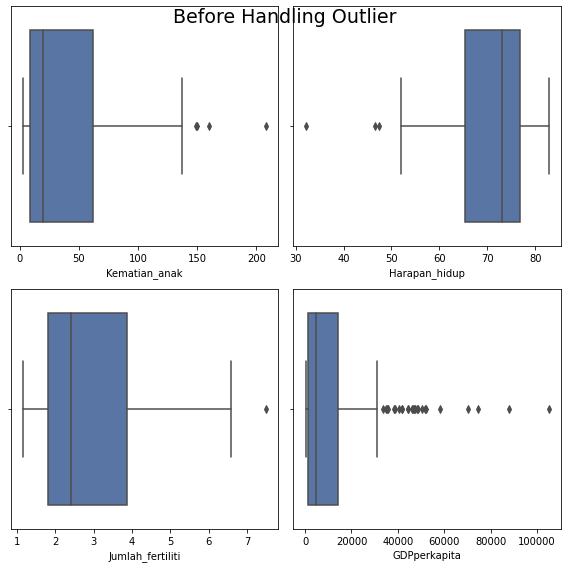

In [17]:
fig, ax= plt.subplots(2,2, figsize=(8,8))

plt.suptitle('Before Handling Outlier', fontsize= 19)
sns.set({'figure.figsize':(10,10)})
plt1=sns.boxplot(x='Kematian_anak', data= df1, ax=ax[0,0])
plt2=sns.boxplot(x='Harapan_hidup', data= df1, ax=ax[0,1])
pltt3=sns.boxplot(x='Jumlah_fertiliti', data= df1, ax=ax[1,0])
plt4=sns.boxplot(x='GDPperkapita', data= df1, ax=ax[1,1])


plt.tight_layout()
plt.show()

In [18]:
def remove_outlier(df):
  q1= df.quantile(0.25)
  q3= df.quantile(0.75)
  IQR= q3-q1
  df_final= df[~((df < (q1-(IQR*1.5)))|(df>(q3+(IQR*1.5))))]
  return df_final

In [19]:
df2= remove_outlier(df[['Kematian_anak','Harapan_hidup','Jumlah_fertiliti','GDPperkapita']])
df2.dropna(axis=0, inplace=True)

##Boxplot setelah removing Outlier

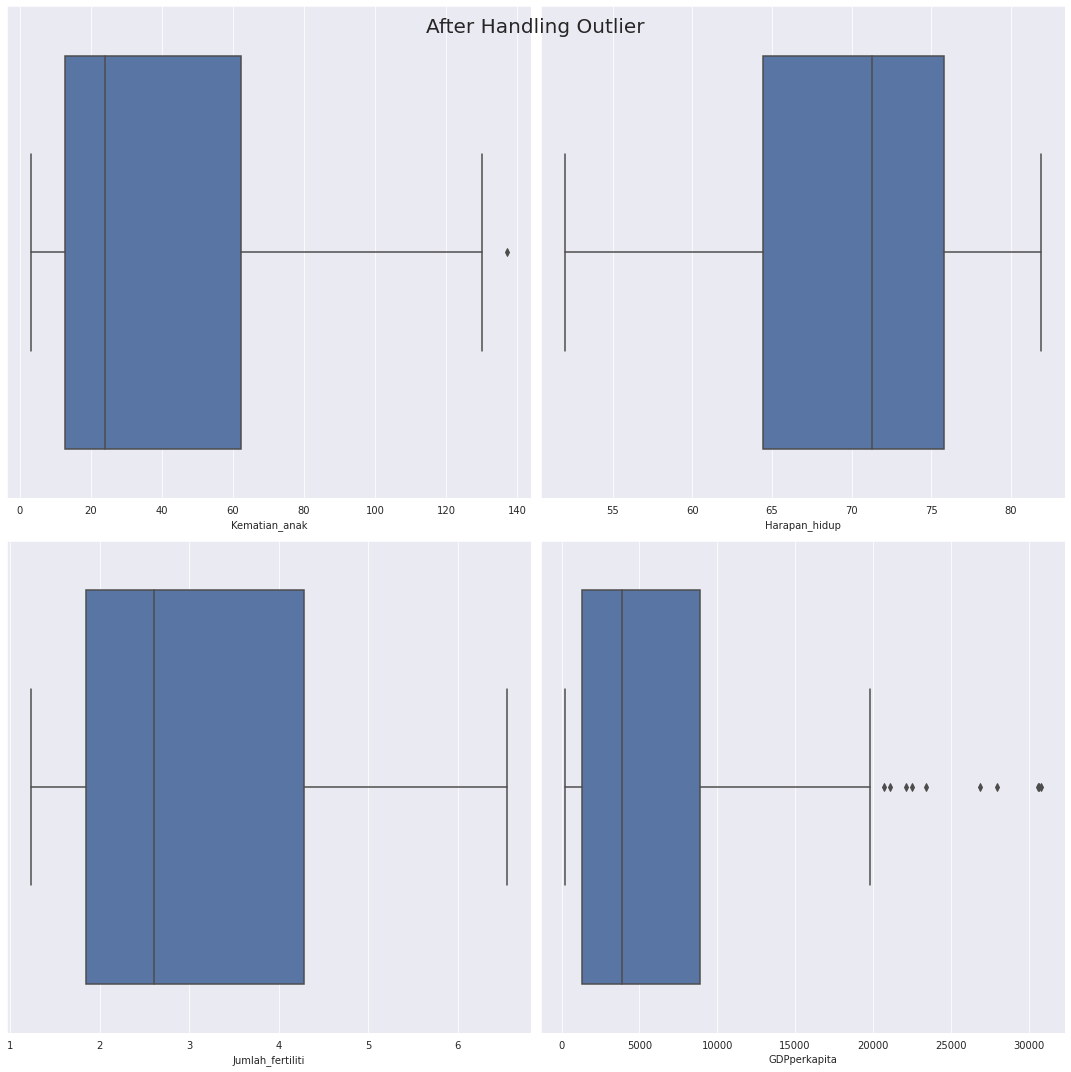

In [20]:
fig, ax= plt.subplots(2,2, figsize=(15,15))

plt.suptitle('After Handling Outlier', fontsize= 20)
sns.set({'figure.figsize':(10,10)})
plt1=sns.boxplot(x='Kematian_anak', data= df2, ax=ax[0,0])
plt2=sns.boxplot(x='Harapan_hidup', data= df2, ax=ax[0,1])
pltt3=sns.boxplot(x='Jumlah_fertiliti', data= df2, ax=ax[1,0])
plt4=sns.boxplot(x='GDPperkapita', data= df2, ax=ax[1,1])

plt.tight_layout()
plt.show()

##Standard Scalling and Clustering
## 3 Cluster

In [21]:
#menyamakan Scale atau value untuk tiap columns
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [22]:
from sklearn.cluster import KMeans

In [23]:
#BUAT DF DENGAN DUA VARIABEL
new_df1= df2[['Kematian_anak', 'Harapan_hidup']]
new_df2= df2[['Kematian_anak', 'Jumlah_fertiliti']]
new_df3= df2[['Kematian_anak', 'GDPperkapita']]
new_df4= df2[['Harapan_hidup', 'Jumlah_fertiliti']]
new_df5= df2[['Harapan_hidup', 'GDPperkapita']]
new_df6= df2[['Jumlah_fertiliti', 'GDPperkapita']]

In [24]:
#Scaling standar utk setiap new_df1 - 6
df_std1= sc.fit_transform(new_df1.astype(float))
df_std2= sc.fit_transform(new_df2.astype(float))
df_std3= sc.fit_transform(new_df3.astype(float))
df_std4= sc.fit_transform(new_df4.astype(float))
df_std5= sc.fit_transform(new_df5.astype(float))
df_std6= sc.fit_transform(new_df6.astype(float))

kmeans1= KMeans(n_clusters=3, random_state=42).fit(df_std1)
kmeans2= KMeans(n_clusters=3, random_state=42).fit(df_std2)
kmeans3= KMeans(n_clusters=3, random_state=42).fit(df_std3)
kmeans4= KMeans(n_clusters=3, random_state=42).fit(df_std4)
kmeans5= KMeans(n_clusters=3, random_state=42).fit(df_std5)
kmeans6= KMeans(n_clusters=3, random_state=42).fit(df_std6)

labels1= kmeans1.labels_
labels2= kmeans2.labels_
labels3= kmeans3.labels_
labels4= kmeans4.labels_
labels5= kmeans5.labels_
labels6= kmeans6.labels_

In [25]:
temp1= pd.DataFrame(data=df_std1, columns=['Kematian_anak', 'Harapan_hidup'])
temp2= pd.DataFrame(data=df_std2, columns=['Kematian_anak', 'Jumlah_fertiliti'])
temp3= pd.DataFrame(data=df_std3, columns=['Kematian_anak', 'GDPperkapita'])
temp4= pd.DataFrame(data=df_std4, columns=['Harapan_hidup', 'Jumlah_fertiliti'])
temp5= pd.DataFrame(data=df_std5, columns=['Harapan_hidup', 'GDPperkapita'])
temp6= pd.DataFrame(data=df_std6, columns=['Jumlah_fertiliti', 'GDPperkapita'])

temp1['labels_kmeans']= labels1
temp2['labels_kmeans']= labels2
temp3['labels_kmeans']= labels3
temp4['labels_kmeans']= labels4
temp5['labels_kmeans']= labels5
temp6['labels_kmeans']= labels6

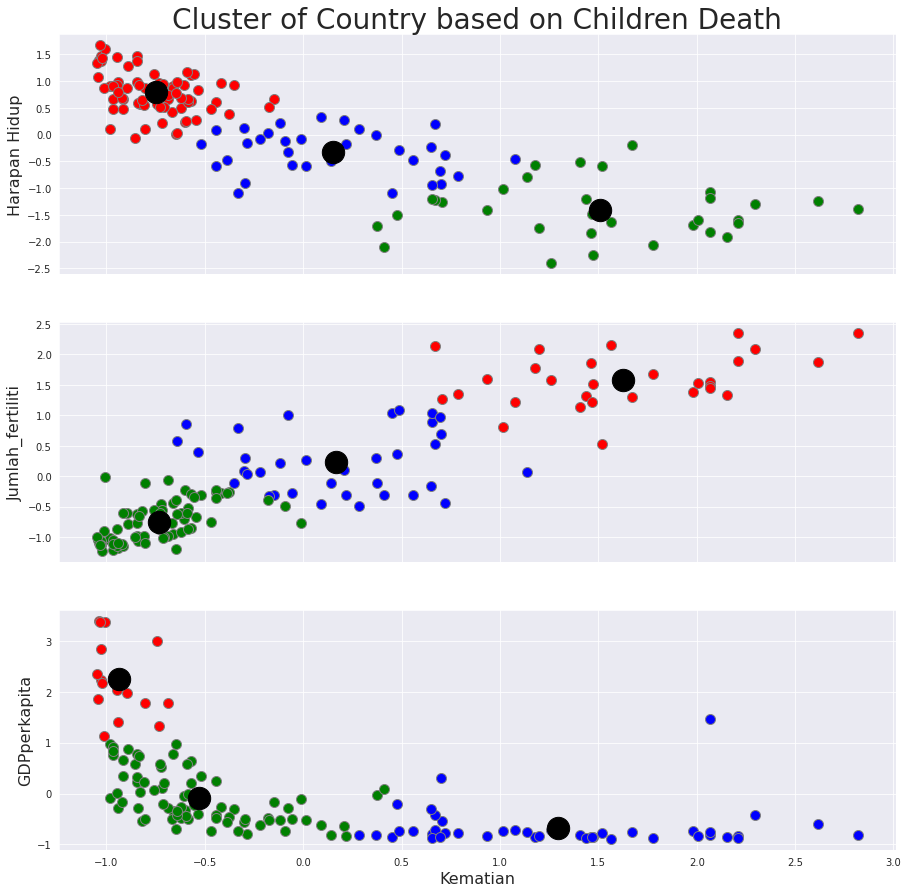

In [26]:
fig, (ax1, ax2, ax3)= plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(15,15))


ax1.scatter(temp1['Kematian_anak'][temp1.labels_kmeans==0], temp1['Harapan_hidup'][temp1.labels_kmeans==0], c='blue', s= 100, edgecolors='gray')
ax1.scatter(temp1['Kematian_anak'][temp1.labels_kmeans==1], temp1['Harapan_hidup'][temp1.labels_kmeans==1], c='red', s= 100, edgecolors='gray')
ax1.scatter(temp1['Kematian_anak'][temp1.labels_kmeans==2], temp1['Harapan_hidup'][temp1.labels_kmeans==2], c='green', s= 100, edgecolors='gray')

ax2.scatter(temp2['Kematian_anak'][temp2.labels_kmeans==0], temp2['Jumlah_fertiliti'][temp2.labels_kmeans==0], c='blue', s= 100, edgecolors='gray')
ax2.scatter(temp2['Kematian_anak'][temp2.labels_kmeans==1], temp2['Jumlah_fertiliti'][temp2.labels_kmeans==1], c='red', s= 100, edgecolors='gray')
ax2.scatter(temp2['Kematian_anak'][temp2.labels_kmeans==2], temp2['Jumlah_fertiliti'][temp2.labels_kmeans==2], c='green', s= 100, edgecolors='gray')

ax3.scatter(temp3['Kematian_anak'][temp3.labels_kmeans==0], temp3['GDPperkapita'][temp3.labels_kmeans==0], c='blue', s= 100, edgecolors='gray')
ax3.scatter(temp3['Kematian_anak'][temp3.labels_kmeans==1], temp3['GDPperkapita'][temp3.labels_kmeans==1], c='red', s= 100, edgecolors='gray')
ax3.scatter(temp3['Kematian_anak'][temp3.labels_kmeans==2], temp3['GDPperkapita'][temp3.labels_kmeans==2], c='green', s= 100, edgecolors='gray')

#centroid
ax1.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1],c='black', s= 500)
ax2.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1],c='black', s= 500)
ax3.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1],c='black', s= 500)

# ax1.set_xlabel('Kematian')
ax1.set_title('Cluster of Country based on Children Death', fontsize= 28)
ax1.set_ylabel('Harapan Hidup', fontsize= 16)
ax2.set_ylabel('Jumlah_fertiliti', fontsize= 16)
ax3.set_ylabel('GDPperkapita', fontsize= 16)
ax3.set_xlabel('Kematian', fontsize= 16)

plt.tight_layout
plt.show()

**Berdasarkan Grafik 1 di atas dapat dilihat bahwa Kmeans 2(hijau) menunjukan Negara dengan Kematian Tinggi dan Harapan hidup Rendah, Selanjutnya Grafik dua menunjukan Kmeans 1(merah) menunjukan kluster negara dengan kematian tinggi dan Jumlah Fertiliti tinggi, Selanjutnya grafik 3 menunjukan bahwa Kmeans 0 (biru) menunjukan kluster negara dengan kematian anak tinggi dan GDP rendah**

Text(0, 0.5, 'WCSS')

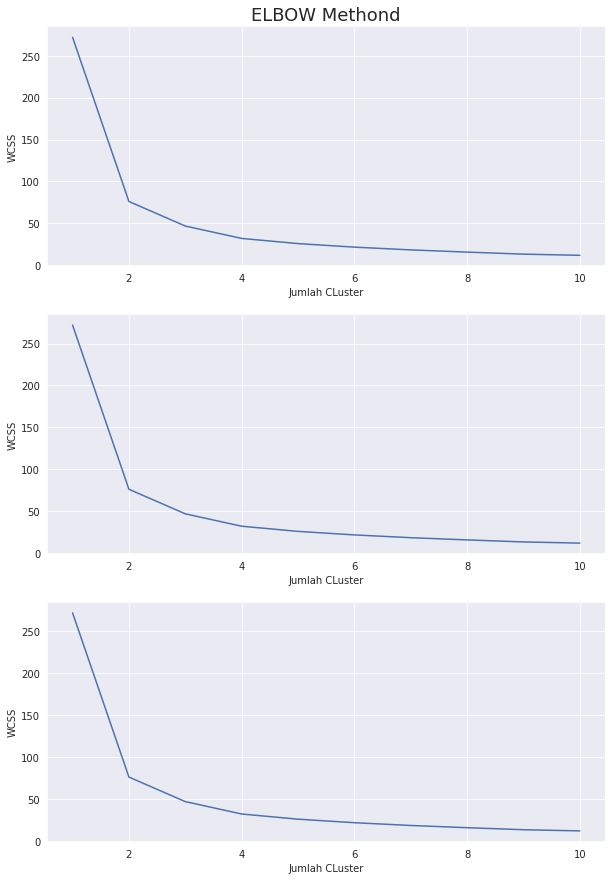

In [27]:
wcss1=[]
wcss2=[]
wcss3=[]
for i in range (1,11):
  kmeans1= KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans1.fit(df_std1)
  wcss1.append(kmeans1.inertia_)

for i in range (1,11):
  kmeans2= KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans2.fit(df_std1)
  wcss2.append(kmeans2.inertia_)

for i in range (1,11):
  kmeans3= KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans3.fit(df_std1)
  wcss3.append(kmeans3.inertia_)

fig, (ax1, ax2, ax3)= plt.subplots(nrows=3, ncols=1,  figsize=(10,15))
ax1.plot(range(1,11), wcss1)
ax2.plot(range(1,11), wcss2)
ax3.plot(range(1,11), wcss3)
ax1.set_xlabel('Jumlah CLuster')
ax2.set_xlabel('Jumlah CLuster')
ax3.set_xlabel('Jumlah CLuster')
ax1.set_title('ELBOW Methond', fontsize=18)
ax1.set_ylabel("WCSS")
ax2.set_ylabel("WCSS")
ax3.set_ylabel("WCSS")

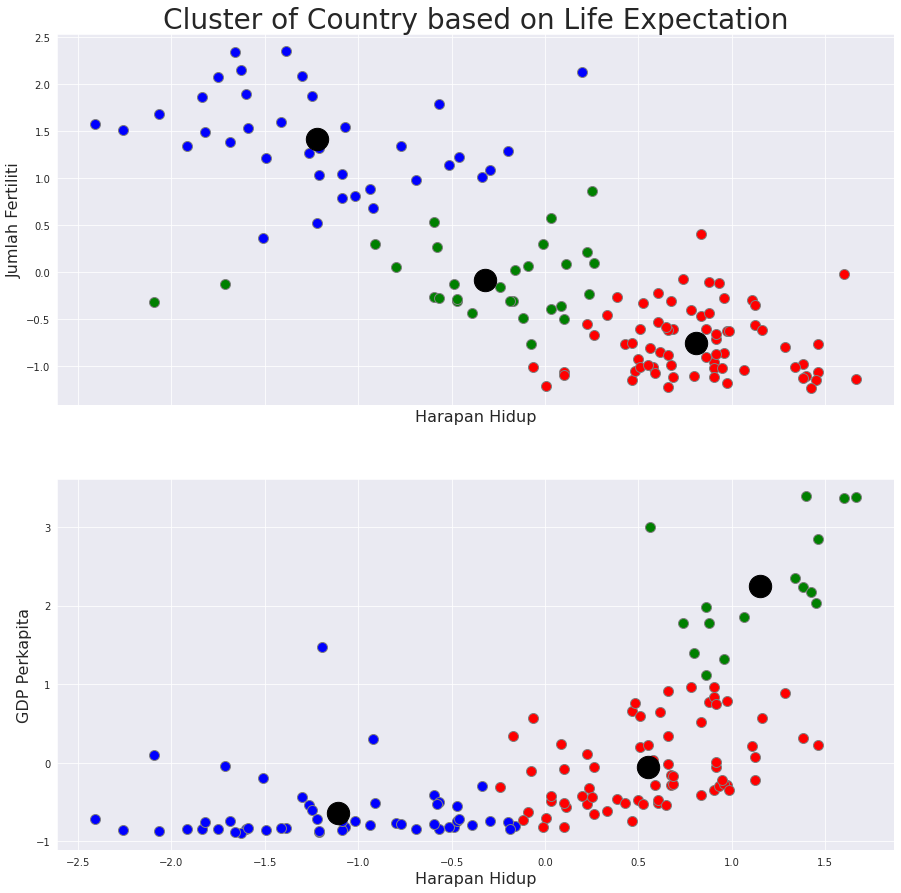

In [28]:
fig, (ax1, ax2)= plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15,15))


ax1.scatter(temp4['Harapan_hidup'][temp4.labels_kmeans==0], temp4['Jumlah_fertiliti'][temp4.labels_kmeans==0], c='blue', s= 100, edgecolors='gray')
ax1.scatter(temp4['Harapan_hidup'][temp4.labels_kmeans==1], temp4['Jumlah_fertiliti'][temp4.labels_kmeans==1], c='red', s= 100, edgecolors='gray')
ax1.scatter(temp4['Harapan_hidup'][temp4.labels_kmeans==2], temp4['Jumlah_fertiliti'][temp4.labels_kmeans==2], c='green', s= 100, edgecolors='gray')

ax2.scatter(temp5['Harapan_hidup'][temp5.labels_kmeans==0], temp5['GDPperkapita'][temp5.labels_kmeans==0], c='blue', s= 100, edgecolors='gray')
ax2.scatter(temp5['Harapan_hidup'][temp5.labels_kmeans==1], temp5['GDPperkapita'][temp5.labels_kmeans==1], c='red', s= 100, edgecolors='gray')
ax2.scatter(temp5['Harapan_hidup'][temp5.labels_kmeans==2], temp5['GDPperkapita'][temp5.labels_kmeans==2], c='green', s= 100, edgecolors='gray')

#centroid
ax1.scatter(kmeans4.cluster_centers_[:,0], kmeans4.cluster_centers_[:,1],c='black', s= 500)
ax2.scatter(kmeans5.cluster_centers_[:,0], kmeans5.cluster_centers_[:,1],c='black', s= 500)

# ax1.set_xlabel('Kematian')
ax1.set_title('Cluster of Country based on Life Expectation', fontsize= 28)
ax1.set_xlabel('Harapan Hidup', fontsize= 16)
ax2.set_xlabel('Harapan Hidup', fontsize= 16)
ax1.set_ylabel('Jumlah Fertiliti', fontsize= 16)
ax2.set_ylabel('GDP Perkapita', fontsize= 16)

plt.tight_layout
plt.show()

**Grafik 1 menunjukan bahwa Kmeans 0(biru) menunjukan bahwa negara dengan Harapan hidup rendah meskipun jumlah fertiliti tinggi, grafik 2 menunjukan Kmeans 0(biru) merupakan kluster negara dengan harapan hidup rendah dan GDP rendah **

Text(0, 0.5, 'WCSS')

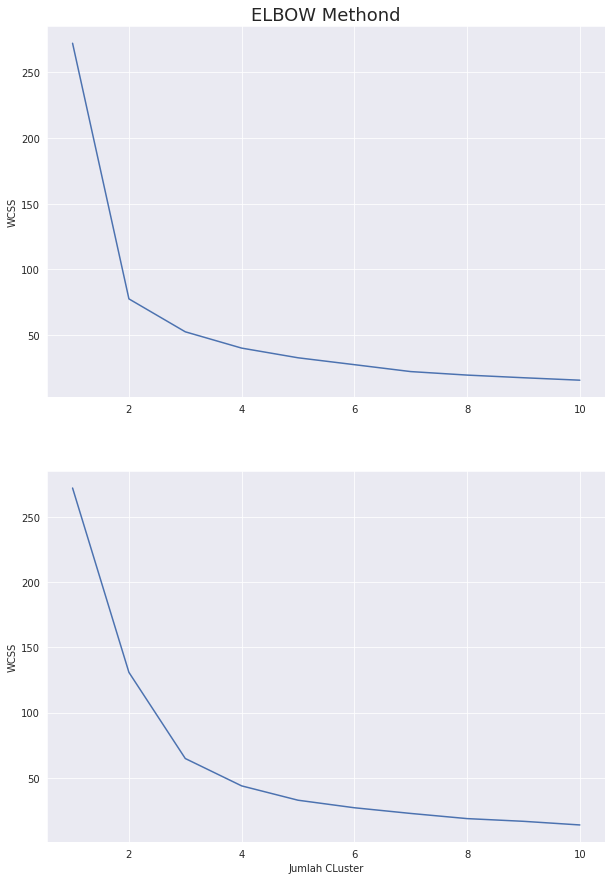

In [29]:
wcss1=[]
wcss2=[]
for i in range (1,11):
  kmeans1= KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans1.fit(df_std4)
  wcss1.append(kmeans1.inertia_)

for i in range (1,11):
  kmeans2= KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans2.fit(df_std5)
  wcss2.append(kmeans2.inertia_)


fig, (ax1, ax2)= plt.subplots(nrows=2, ncols=1,  figsize=(10,15))
ax1.plot(range(1,11), wcss1)
ax2.plot(range(1,11), wcss2)
ax2.set_xlabel('Jumlah CLuster')
ax1.set_title('ELBOW Methond', fontsize=18)
ax1.set_ylabel("WCSS")
ax2.set_ylabel("WCSS")

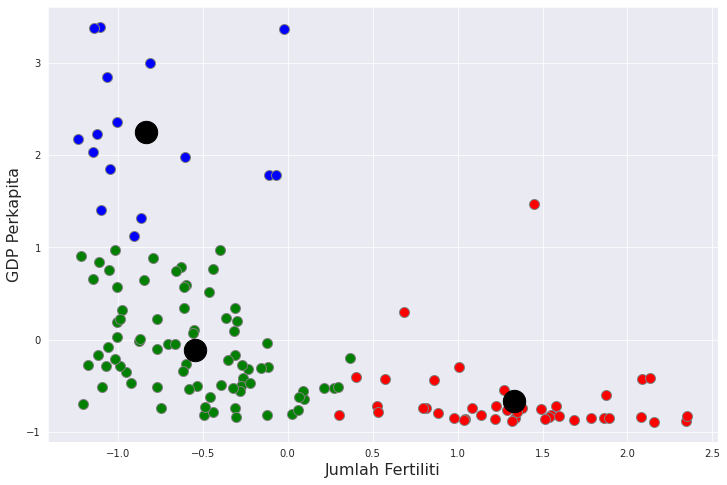

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(temp6['Jumlah_fertiliti'][temp6.labels_kmeans==0], temp6['GDPperkapita'][temp6.labels_kmeans==0], c='blue', s= 100, edgecolors='gray')
plt.scatter(temp6['Jumlah_fertiliti'][temp6.labels_kmeans==1], temp6['GDPperkapita'][temp6.labels_kmeans==1], c='red', s= 100, edgecolors='gray')
plt.scatter(temp6['Jumlah_fertiliti'][temp6.labels_kmeans==2], temp6['GDPperkapita'][temp6.labels_kmeans==2], c='green', s= 100, edgecolors='gray')

#centroid
plt.scatter(kmeans6.cluster_centers_[:,0], kmeans6.cluster_centers_[:,1],c='black', s= 500)
plt.xlabel('Jumlah Fertiliti', fontsize=16)
plt.ylabel('GDP Perkapita', fontsize=16)

plt.tight_layout
plt.show()



**Grafik di atas menunjukan bahwa Kmeans 1(merah) merupakan kluster negara miskin dengan jumlah fertiliti rendah dan GDP perkapita rendah**





Text(0, 0.5, 'WCSS')

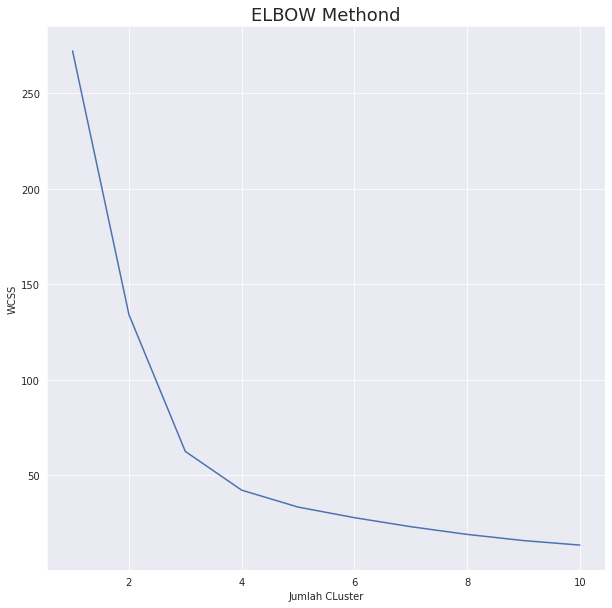

In [31]:
wcss1=[]
for i in range (1,11):
  kmeans1= KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans1.fit(df_std6)
  wcss1.append(kmeans1.inertia_)


plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss1)
plt.xlabel('Jumlah CLuster')
plt.title('ELBOW Methond', fontsize=18)
plt.ylabel("WCSS")

In [32]:
from sklearn.metrics import silhouette_score

x1=silhouette_score(df_std1, labels= labels1)
x2=silhouette_score(df_std2, labels= labels2)
x3=silhouette_score(df_std3, labels= labels3)
x4=silhouette_score(df_std4, labels= labels4)
x5=silhouette_score(df_std5, labels= labels5)
x6=silhouette_score(df_std6, labels= labels6)
sil_3= [x1, x2,x3,x4,x5, x6]
# print(sil_3)

#Clustering
##2 cluster

In [33]:
df_std1= sc.fit_transform(new_df1.astype(float))
df_std2= sc.fit_transform(new_df2.astype(float))
df_std3= sc.fit_transform(new_df3.astype(float))
df_std4= sc.fit_transform(new_df4.astype(float))
df_std5= sc.fit_transform(new_df5.astype(float))
df_std6= sc.fit_transform(new_df6.astype(float))

kmeans1= KMeans(n_clusters=2, random_state=42).fit(df_std1)
kmeans2= KMeans(n_clusters=2, random_state=42).fit(df_std2)
kmeans3= KMeans(n_clusters=2, random_state=42).fit(df_std3)
kmeans4= KMeans(n_clusters=2, random_state=42).fit(df_std4)
kmeans5= KMeans(n_clusters=2, random_state=42).fit(df_std5)
kmeans6= KMeans(n_clusters=2, random_state=42).fit(df_std6)

labels12= kmeans1.labels_
labels22= kmeans2.labels_
labels32= kmeans3.labels_
labels42= kmeans4.labels_
labels52= kmeans5.labels_
labels62= kmeans6.labels_


In [34]:
temp1= pd.DataFrame(data=df_std1, columns=['Kematian_anak', 'Harapan_hidup'])
temp2= pd.DataFrame(data=df_std2, columns=['Kematian_anak', 'Jumlah_fertiliti'])
temp3= pd.DataFrame(data=df_std3, columns=['Kematian_anak', 'GDPperkapita'])
temp4= pd.DataFrame(data=df_std4, columns=['Harapan_hidup', 'Jumlah_fertiliti'])
temp5= pd.DataFrame(data=df_std5, columns=['Harapan_hidup', 'GDPperkapita'])
temp6= pd.DataFrame(data=df_std6, columns=['Jumlah_fertiliti', 'GDPperkapita'])

temp1['labels_kmeans']= labels12
temp2['labels_kmeans']= labels22
temp3['labels_kmeans']= labels32
temp4['labels_kmeans']= labels42
temp5['labels_kmeans']= labels52
temp6['labels_kmeans']= labels62

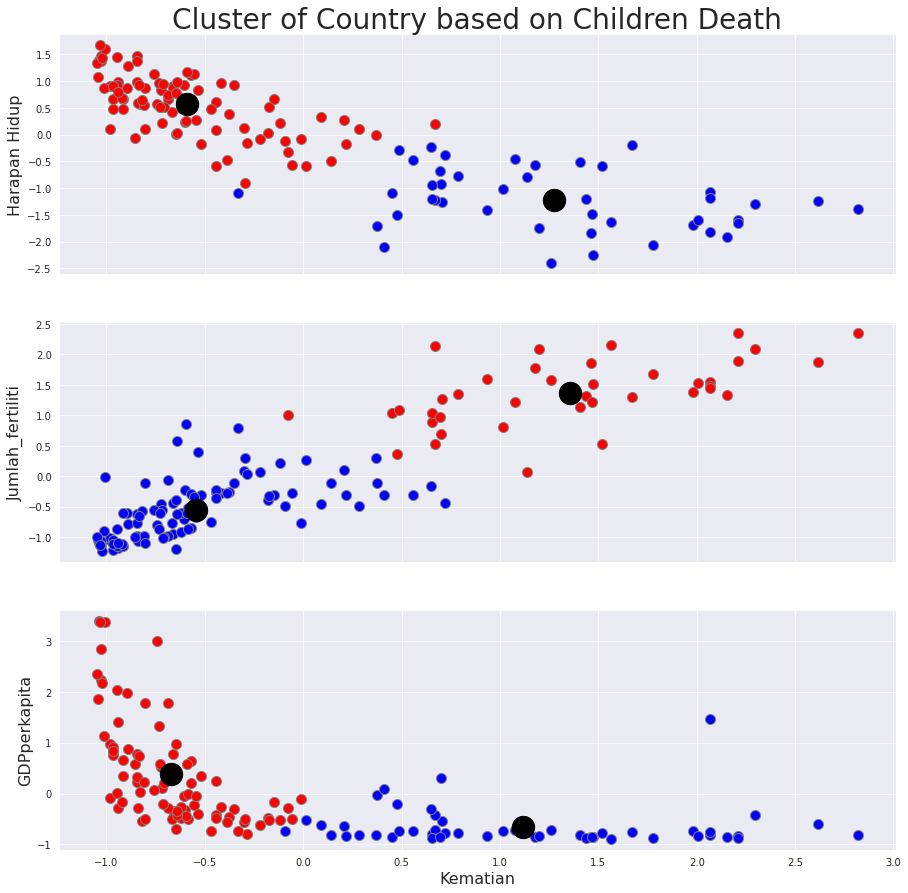

In [35]:
fig, (ax1, ax2, ax3)= plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(15,15))


ax1.scatter(temp1['Kematian_anak'][temp1.labels_kmeans==0], temp1['Harapan_hidup'][temp1.labels_kmeans==0], c='blue', s= 100, edgecolors='gray')
ax1.scatter(temp1['Kematian_anak'][temp1.labels_kmeans==1], temp1['Harapan_hidup'][temp1.labels_kmeans==1], c='red', s= 100, edgecolors='gray')

ax2.scatter(temp2['Kematian_anak'][temp2.labels_kmeans==0], temp2['Jumlah_fertiliti'][temp2.labels_kmeans==0], c='blue', s= 100, edgecolors='gray')
ax2.scatter(temp2['Kematian_anak'][temp2.labels_kmeans==1], temp2['Jumlah_fertiliti'][temp2.labels_kmeans==1], c='red', s= 100, edgecolors='gray')

ax3.scatter(temp3['Kematian_anak'][temp3.labels_kmeans==0], temp3['GDPperkapita'][temp3.labels_kmeans==0], c='blue', s= 100, edgecolors='gray')
ax3.scatter(temp3['Kematian_anak'][temp3.labels_kmeans==1], temp3['GDPperkapita'][temp3.labels_kmeans==1], c='red', s= 100, edgecolors='gray')

#centroid
ax1.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1],c='black', s= 500)
ax2.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1],c='black', s= 500)
ax3.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1],c='black', s= 500)

# ax1.set_xlabel('Kematian')
ax1.set_title('Cluster of Country based on Children Death', fontsize= 28)
ax1.set_ylabel('Harapan Hidup', fontsize= 16)
ax2.set_ylabel('Jumlah_fertiliti', fontsize= 16)
ax3.set_ylabel('GDPperkapita', fontsize= 16)
ax3.set_xlabel('Kematian', fontsize= 16)

plt.tight_layout
plt.show()

**Grafik 1 menunjukan bahwa kmeans 0(biru) merupakan klaster negara  dengan Kematian anak tinggi dan harapan hidup rendah, grafik dua menunjukan kmeans 1 (merah) merupakan kluster negara dengan tingkat kematian tinggi dan jumlah fertiliti tinggi, sedangkan grafik 3 menunjukan bahwa kmeans 0 (biru) menununjukan negara  dengan tingkat kematian tinggi dan GDP rendah**

Text(0, 0.5, 'WCSS')

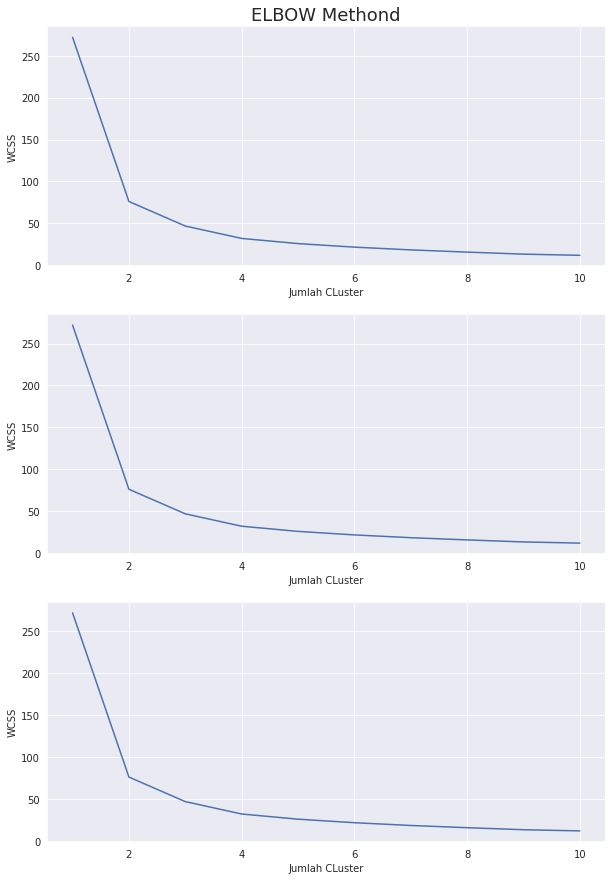

In [36]:
wcss1=[]
wcss2=[]
wcss3=[]
for i in range (1,11):
  kmeans1= KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans1.fit(df_std1)
  wcss1.append(kmeans1.inertia_)

for i in range (1,11):
  kmeans2= KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans2.fit(df_std1)
  wcss2.append(kmeans2.inertia_)

for i in range (1,11):
  kmeans3= KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans3.fit(df_std1)
  wcss3.append(kmeans3.inertia_)

fig, (ax1, ax2, ax3)= plt.subplots(nrows=3, ncols=1,  figsize=(10,15))
ax1.plot(range(1,11), wcss1)
ax2.plot(range(1,11), wcss2)
ax3.plot(range(1,11), wcss3)
ax1.set_xlabel('Jumlah CLuster')
ax2.set_xlabel('Jumlah CLuster')
ax3.set_xlabel('Jumlah CLuster')
ax1.set_title('ELBOW Methond', fontsize=18)
ax1.set_ylabel("WCSS")
ax2.set_ylabel("WCSS")
ax3.set_ylabel("WCSS")



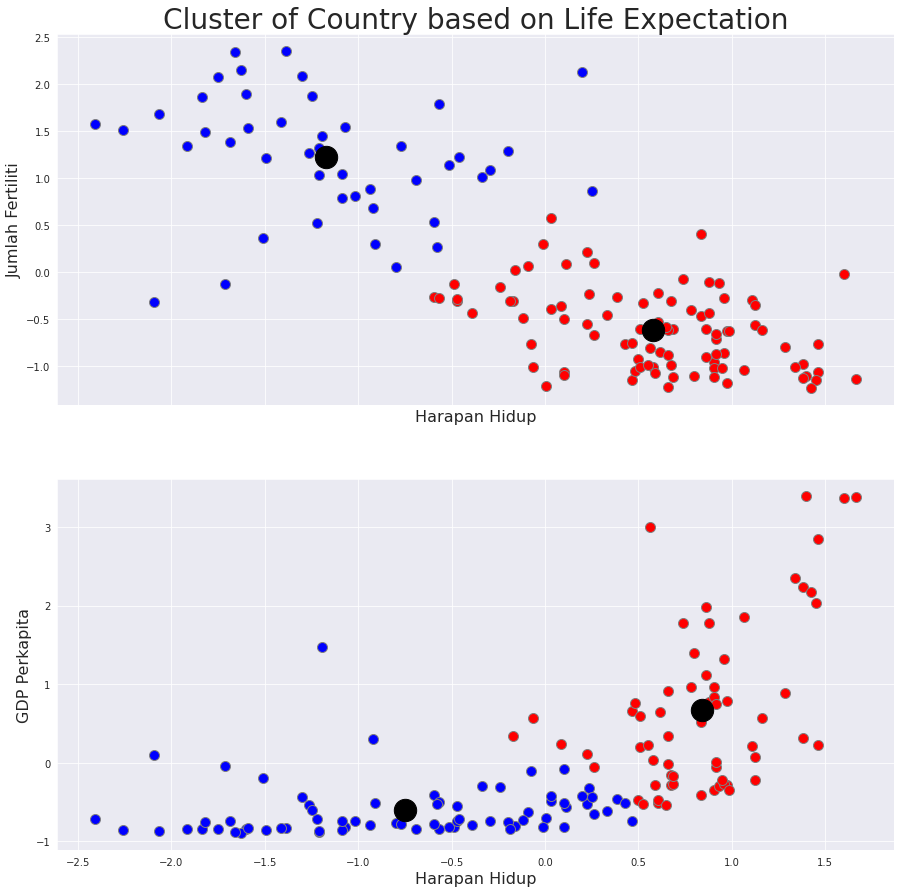

In [37]:
fig, (ax1, ax2)= plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15,15))


ax1.scatter(temp4['Harapan_hidup'][temp4.labels_kmeans==0], temp4['Jumlah_fertiliti'][temp4.labels_kmeans==0], c='blue', s= 100, edgecolors='gray')
ax1.scatter(temp4['Harapan_hidup'][temp4.labels_kmeans==1], temp4['Jumlah_fertiliti'][temp4.labels_kmeans==1], c='red', s= 100, edgecolors='gray')

ax2.scatter(temp5['Harapan_hidup'][temp5.labels_kmeans==0], temp5['GDPperkapita'][temp5.labels_kmeans==0], c='blue', s= 100, edgecolors='gray')
ax2.scatter(temp5['Harapan_hidup'][temp5.labels_kmeans==1], temp5['GDPperkapita'][temp5.labels_kmeans==1], c='red', s= 100, edgecolors='gray')

#centroid
ax1.scatter(kmeans4.cluster_centers_[:,0], kmeans4.cluster_centers_[:,1],c='black', s= 500)
ax2.scatter(kmeans5.cluster_centers_[:,0], kmeans5.cluster_centers_[:,1],c='black', s= 500)

# ax1.set_xlabel('Kematian')
ax1.set_title('Cluster of Country based on Life Expectation', fontsize= 28)
ax1.set_xlabel('Harapan Hidup', fontsize= 16)
ax2.set_xlabel('Harapan Hidup', fontsize= 16)
ax1.set_ylabel('Jumlah Fertiliti', fontsize= 16)
ax2.set_ylabel('GDP Perkapita', fontsize= 16)

plt.tight_layout
plt.show()

**Grafik 1 menunjukan bahwa kmeans 0(biru) merupakan negara miskin dengan harapan hidup rendah meskipun jumlah fertiliti tinggi, sedangkan grafik 2 menunjukan bahwa kmeans 0(biru) merupakan kelompok negara dengan harapan hidup rendah dan GDP kecil**

Text(0, 0.5, 'WCSS')

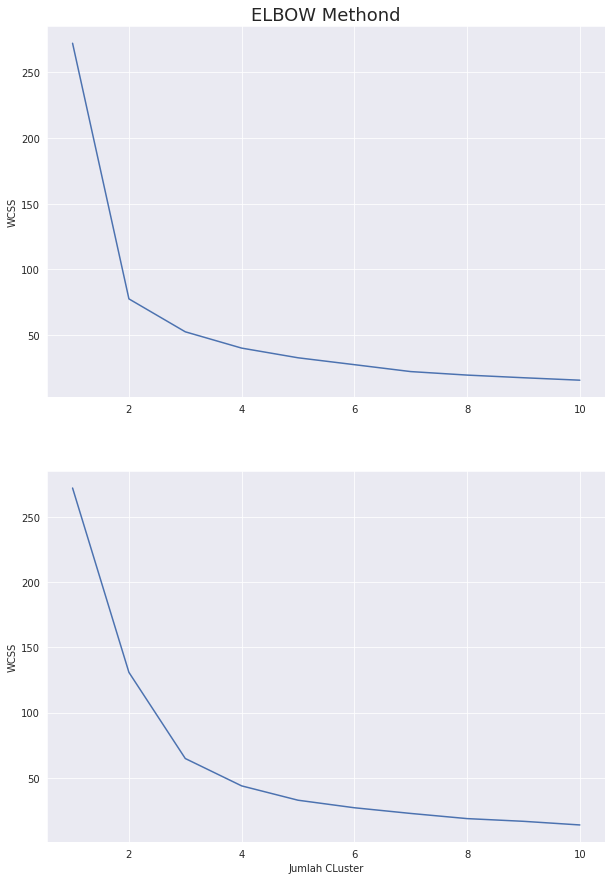

In [38]:
wcss1=[]
wcss2=[]
for i in range (1,11):
  kmeans1= KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans1.fit(df_std4)
  wcss1.append(kmeans1.inertia_)

for i in range (1,11):
  kmeans2= KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans2.fit(df_std5)
  wcss2.append(kmeans2.inertia_)


fig, (ax1, ax2)= plt.subplots(nrows=2, ncols=1,  figsize=(10,15))
ax1.plot(range(1,11), wcss1)
ax2.plot(range(1,11), wcss2)
ax2.set_xlabel('Jumlah CLuster')
ax1.set_title('ELBOW Methond', fontsize=18)
ax1.set_ylabel("WCSS")
ax2.set_ylabel("WCSS")



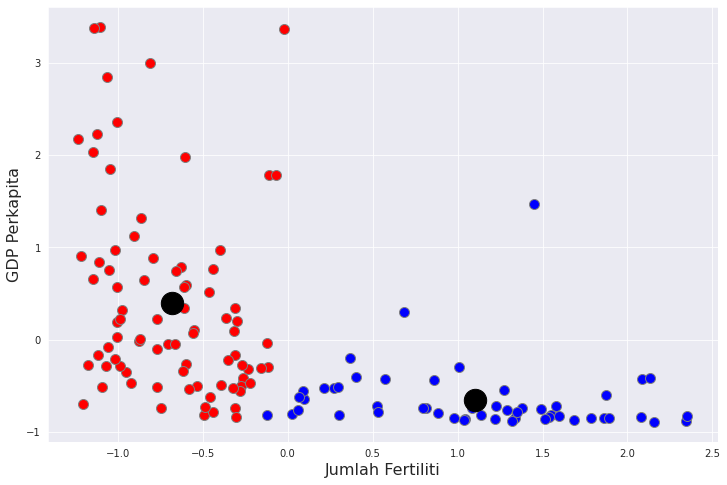

In [39]:
plt.figure(figsize=(12,8))
plt.scatter(temp6['Jumlah_fertiliti'][temp6.labels_kmeans==0], temp6['GDPperkapita'][temp6.labels_kmeans==0], c='blue', s= 100, edgecolors='gray')
plt.scatter(temp6['Jumlah_fertiliti'][temp6.labels_kmeans==1], temp6['GDPperkapita'][temp6.labels_kmeans==1], c='red', s= 100, edgecolors='gray')

#centroid
plt.scatter(kmeans6.cluster_centers_[:,0], kmeans6.cluster_centers_[:,1],c='black', s= 500)
plt.xlabel('Jumlah Fertiliti', fontsize=16)
plt.ylabel('GDP Perkapita', fontsize=16)

plt.tight_layout
plt.show()

**Grafik di atas menunjukan bahwa kmeans(0) merupakan kluster negara dengan jumlah fertiliti tinggi dan GDP rendah**

Text(0, 0.5, 'WCSS')

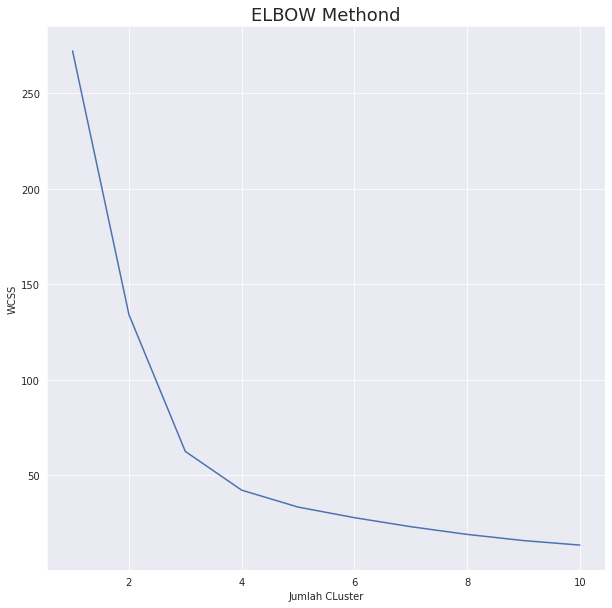

In [40]:
wcss1=[]
for i in range (1,11):
  kmeans1= KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans1.fit(df_std6)
  wcss1.append(kmeans1.inertia_)


plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss1)
plt.xlabel('Jumlah CLuster')
plt.title('ELBOW Methond', fontsize=18)
plt.ylabel("WCSS")


In [41]:
from sklearn.metrics import silhouette_score

y1=silhouette_score(df_std1, labels= labels12)
y2=silhouette_score(df_std2, labels= labels22)
y3=silhouette_score(df_std3, labels= labels32)
y4=silhouette_score(df_std4, labels= labels42)
y5=silhouette_score(df_std5, labels= labels52)
y6=silhouette_score(df_std6, labels= labels62)
sil_2= [y1, y2,y3,y4,y5, y6]
# print(sil_3[0])

##Silhouette untuk n_cluter 2 dan 3
**pemilihan kluster yang bai dapat didasarkan oleh nilai sihouette**

In [42]:
print('Kematian Anak VS Harapan Hidup','\n','3 cluster=', sil_3[0],'\n', '2 cluster=', sil_2[0])
print('Kematian Anak VS Jumlah Fertilitas','\n','3 cluster=', sil_3[1],'\n', '2 cluster=', sil_2[1])
print('Kematian Anak VS GDP Perkapita','\n', '3 cluster=', sil_3[2],'\n', '2 cluster=', sil_2[2])
print('Harapan Hidup VS Jumlah Fertilitas','\n', '3 cluster=', sil_3[3],'\n', '2 cluster=', sil_2[3])
print('Harapan Hidup VS GDP Perkapita','\n', '3 cluster=', sil_3[4],'\n', '2 cluster=', sil_2[4])
print('Jumlah Fertilitas VS GDP Perkapita','\n', '3 cluster=', sil_3[5],'\n', '2 cluster=', sil_2[5])


Kematian Anak VS Harapan Hidup 
 3 cluster= 0.5034854488185865 
 2 cluster= 0.6248746606521529
Kematian Anak VS Jumlah Fertilitas 
 3 cluster= 0.520951660131157 
 2 cluster= 0.6617935384017238
Kematian Anak VS GDP Perkapita 
 3 cluster= 0.5374499505433539 
 2 cluster= 0.4783190058070827
Harapan Hidup VS Jumlah Fertilitas 
 3 cluster= 0.4723006203831593 
 2 cluster= 0.6168258328680168
Harapan Hidup VS GDP Perkapita 
 3 cluster= 0.4994611667170284 
 2 cluster= 0.4526851624979245
Jumlah Fertilitas VS GDP Perkapita 
 3 cluster= 0.542878277155216 
 2 cluster= 0.47720825521658705


#parameter Negara Miskin dan Pengeompokan Negara
**Kematian Anak, harapan hidup, jumlah feritlita, GDP Perkapita**

#sebaiknya dianalisa menggunakan :

*Kategori 1= Kematian VS Harapan Hidup is better in 2 clusters*

*Kategori 2= Kematian VS Jumlah Fertiliti is better in 2 clusters*

*Kategori 3= Kematian VS GDP perkapita is better in 3 clusters*

*Kategori 4= Harapan Hidup VS Jumlah Fertilitas is better in 2 clusters*

*Kategori 5= Harapan Hidup VS GDP perkapita is better in 3 clusters*

*Kategori 6=Jumlah Fertilitas VS GDP perkapita is better in 3 clusters*

In [43]:
# Kematian VS Harapan Hidup
Final=pd.DataFrame(df2.index, columns= ['Indeks Negara'])

In [44]:
Final['kmeans1']= labels12 #from 2 cluster
Final['kmeans2']=labels22 #from 2 cluster
Final['kmeans3']= labels3 #from 3 lcuster
Final['kmeans4']= labels42 #from 2 cluster
Final['kmeans5']= labels5  #from 3 cluster
Final['kmeans6']= labels6  #from 3 cluster
Final

,Indeks Negara,kmeans1,kmeans2,kmeans3,kmeans4,kmeans5,kmeans6
0,0,0,1,0,0,0,1
1,1,1,0,2,1,1,2
2,2,1,0,2,1,1,2
3,3,0,1,0,0,0,1
4,4,1,0,2,1,1,2
...,...,...,...,...,...,...,...
131,162,1,0,2,0,0,2
132,163,1,0,2,1,1,2
133,164,1,0,2,1,1,2
134,165,0,1,0,0,0,1


In [45]:
negara=[]
for i in df2.index:
  if i == df.index[i]:
    negara.append(df['Negara'][i])
#negara

In [46]:
Final['Negara']= negara

In [47]:
Final=Final[['Negara', 'kmeans1','kmeans2','kmeans3','kmeans4','kmeans5','kmeans6',]]
Final

,Negara,kmeans1,kmeans2,kmeans3,kmeans4,kmeans5,kmeans6
0,Afghanistan,0,1,0,0,0,1
1,Albania,1,0,2,1,1,2
2,Algeria,1,0,2,1,1,2
3,Angola,0,1,0,0,0,1
4,Antigua and Barbuda,1,0,2,1,1,2
...,...,...,...,...,...,...,...
131,Vanuatu,1,0,2,0,0,2
132,Venezuela,1,0,2,1,1,2
133,Vietnam,1,0,2,1,1,2
134,Yemen,0,1,0,0,0,1


In [48]:
# data["process"] = np.where(data["lead_time"] > 491 ,"Long", np.where(data["lead_time"] >= 245, "Medium", "Short"))
#miskin1
Final["Kategori_1"] = np.where(Final["kmeans1"] == 0 ,"Miskin", "Berkembang")
Final["Kategori_2"] = np.where(Final["kmeans2"] == 1 ,"Miskin", "Berkembang")
Final["Kategori_3"] = np.where(Final["kmeans3"] == 0 ,"Miskin", np.where(Final['kmeans3']== 1, 'Maju',"Berkembang"))
Final["Kategori_4"] = np.where(Final["kmeans4"] == 0 ,"Miskin", "Berkembang")
Final["Kategori_5"] = np.where(Final["kmeans5"] == 0,"Miskin", np.where(Final['kmeans3']== 2, 'Maju',"Berkembang"))
Final["Kategori_6"] = np.where(Final["kmeans6"] == 1,"Miskin", np.where(Final['kmeans3']== 0, 'Maju',"Berkembang"))


In [49]:
Final= Final[['Negara', 'Kategori_1', 'Kategori_2','Kategori_3','Kategori_4','Kategori_5','Kategori_6']]
Final

,Negara,Kategori_1,Kategori_2,Kategori_3,Kategori_4,Kategori_5,Kategori_6
0,Afghanistan,Miskin,Miskin,Miskin,Miskin,Miskin,Miskin
1,Albania,Berkembang,Berkembang,Berkembang,Berkembang,Maju,Berkembang
2,Algeria,Berkembang,Berkembang,Berkembang,Berkembang,Maju,Berkembang
3,Angola,Miskin,Miskin,Miskin,Miskin,Miskin,Miskin
4,Antigua and Barbuda,Berkembang,Berkembang,Berkembang,Berkembang,Maju,Berkembang
...,...,...,...,...,...,...,...
131,Vanuatu,Berkembang,Berkembang,Berkembang,Miskin,Miskin,Berkembang
132,Venezuela,Berkembang,Berkembang,Berkembang,Berkembang,Maju,Berkembang
133,Vietnam,Berkembang,Berkembang,Berkembang,Berkembang,Maju,Berkembang
134,Yemen,Miskin,Miskin,Miskin,Miskin,Miskin,Miskin


#Data Visualisasi

In [50]:
Cat1 =Final[['Negara','Kategori_1']].groupby('Kategori_1').count()
Cat2 =Final[['Negara','Kategori_2']].groupby('Kategori_2').count()
Cat3 =Final[['Negara','Kategori_3']].groupby('Kategori_3').count()
Cat4 =Final[['Negara','Kategori_4']].groupby('Kategori_4').count()
Cat5 =Final[['Negara','Kategori_5']].groupby('Kategori_5').count()
Cat6 =Final[['Negara','Kategori_6']].groupby('Kategori_6').count()

In [51]:
Cat1

,Negara
Kategori_1,
Berkembang,93
Miskin,43


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


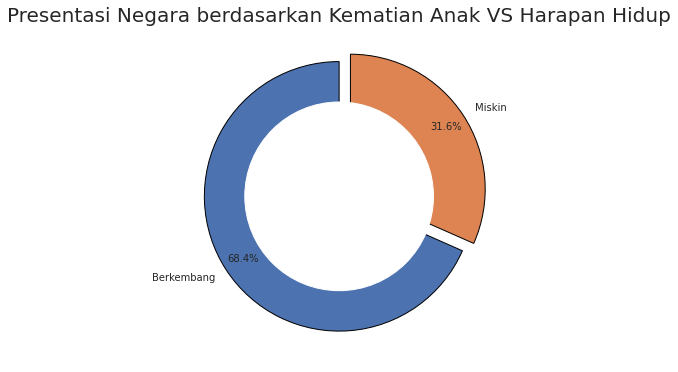

In [52]:
plt.figure(figsize=(8, 6))
explode= [0, 0.1]
plt.pie(Cat1, labels= Cat1.index, explode=explode, startangle=90,
       autopct = '%1.1f%%',pctdistance=0.85, wedgeprops={'edgecolor': 'black'})


centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Presentasi Negara berdasarkan Kematian Anak VS Harapan Hidup", fontsize= 20)

plt.tight_layout()
plt.show()


In [53]:
Cat2

,Negara
Kategori_2,
Berkembang,97
Miskin,39


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


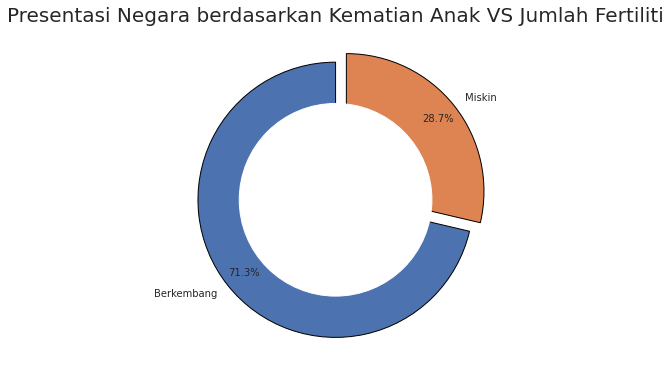

In [54]:
plt.figure(figsize=(8, 6))
explode= [0, 0.1]
plt.pie(Cat2, labels= Cat2.index, explode=explode, startangle=90,
       autopct = '%1.1f%%',pctdistance=0.85, wedgeprops={'edgecolor': 'black'})

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Presentasi Negara berdasarkan Kematian Anak VS Jumlah Fertiliti", fontsize= 20)

plt.tight_layout()
plt.show()

In [55]:
Cat3

,Negara
Kategori_3,
Berkembang,77
Maju,16
Miskin,43


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


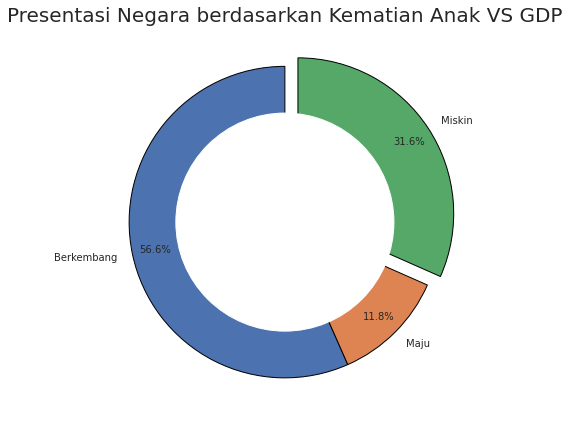

In [56]:
plt.figure(figsize=(8, 6))
explode= [0, 0, 0.1]
plt.pie(Cat3, labels= Cat3.index, explode=explode, startangle=90,
       autopct = '%1.1f%%',pctdistance=0.85, wedgeprops={'edgecolor': 'black'})

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Presentasi Negara berdasarkan Kematian Anak VS GDP", fontsize= 20)

plt.tight_layout()
plt.show()


In [57]:
Cat4

,Negara
Kategori_4,
Berkembang,91
Miskin,45


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


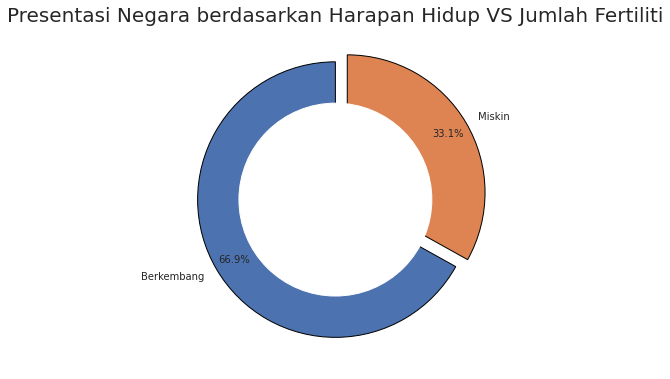

In [58]:
plt.figure(figsize=(8, 6))
explode= [0, 0.1]
plt.pie(Cat4, labels= Cat4.index, explode=explode, startangle=90,
       autopct = '%1.1f%%',pctdistance=0.85, wedgeprops={'edgecolor': 'black'})

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Presentasi Negara berdasarkan Harapan Hidup VS Jumlah Fertiliti", fontsize= 20)

plt.tight_layout()
plt.show()


In [59]:
Cat5

,Negara
Kategori_5,
Berkembang,20
Maju,65
Miskin,51


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


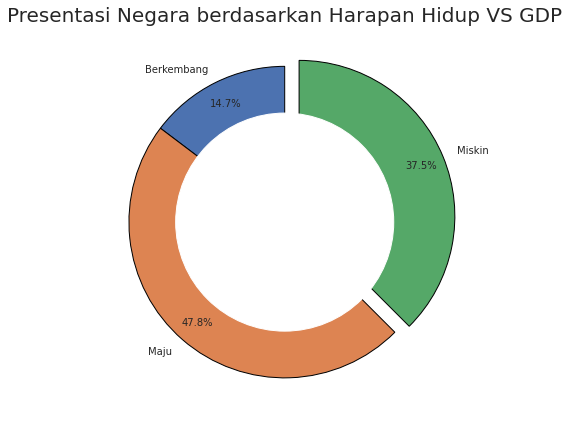

In [60]:
plt.figure(figsize=(8, 6))
explode= [0, 0, 0.1]
plt.pie(Cat5, labels= Cat5.index, explode=explode, startangle=90,
       autopct = '%1.1f%%',pctdistance=0.85, wedgeprops={'edgecolor': 'black'})

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Presentasi Negara berdasarkan Harapan Hidup VS GDP", fontsize= 20)

plt.tight_layout()
plt.show()


In [61]:
Cat6

,Negara
Kategori_6,
Berkembang,88
Maju,6
Miskin,42


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


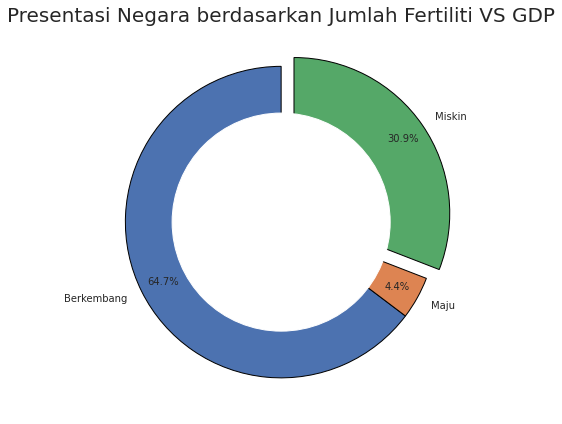

In [62]:
plt.figure(figsize=(8, 6))
explode= [0, 0, 0.1]
plt.pie(Cat6, labels= Cat6.index, explode=explode, startangle=90,
       autopct = '%1.1f%%',pctdistance=0.85, wedgeprops={'edgecolor': 'black'})

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.title("Presentasi Negara berdasarkan Jumlah Fertiliti VS GDP", fontsize= 20)

plt.tight_layout()
plt.show()


In [63]:
# st = data[data["START*"].isin(["Cary","New York"])]
penerima= Final[Final['Kategori_1'].isin(['Miskin']) 
& Final['Kategori_2'].isin(['Miskin']) 
& Final['Kategori_3'].isin(['Miskin'])
& Final['Kategori_4'].isin(['Miskin'])
& Final['Kategori_5'].isin(['Miskin'])
& Final['Kategori_6'].isin(['Miskin'])]

In [64]:
penerima_final= penerima[['Negara']]
penerima_final.reset_index(drop=True,inplace=True)
penerima_final

,Negara
0,Afghanistan
1,Angola
2,Benin
3,Burkina Faso
4,Burundi
5,Cameroon
6,Comoros
7,"Congo, Dem. Rep."
8,"Congo, Rep."
9,Cote d'Ivoire
